# Import required Python libraries

In [4]:
import numpy as np
import os

import pandas as pd
import tensorflow as tf
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit
from tensorflow import random_uniform_initializer as rui
import time
from ripser import ripser
from persim import plot_diagrams
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
import gudhi.representations as tda

In [5]:
from perslay import PerslayModel

In [6]:
from experiments import *

In [6]:
def preprocess(diags_dict, F):
    
    thresh = 500

    # Whole pipeline
    tmp = Pipeline([
            ("Selector",      tda.DiagramSelector(use=True, point_type="finite")),
            ("ProminentPts",  tda.ProminentPoints(use=True, num_pts=thresh)),
            ("Scaler",        tda.DiagramScaler(use=True, scalers=[([0,1], MinMaxScaler())])),
            ("Padding",       tda.Padding(use=True)),
                    ])

    prm = {filt: {"ProminentPts__num_pts": min(thresh, max([len(dgm) for dgm in diags_dict[filt]]))} 
           for filt in diags_dict.keys() if max([len(dgm) for dgm in diags_dict[filt]]) > 0}

    # Apply the previous pipeline on the different filtrations.
    diags = []
    for dt in prm.keys():
        param = prm[dt]
        tmp.set_params(**param)
        diags.append(tmp.fit_transform(diags_dict[dt]))

    # For each filtration, concatenate all diagrams in a single array.
    D, npts = [], len(diags[0])
    for dt in range(len(prm.keys())):
        D.append(np.array(np.concatenate([diags[dt][i][np.newaxis,:] for i in range(npts)],axis=0),dtype=np.float32))
        
    return D

## Load data

In [5]:
dataset = "MUTAG"

In [6]:
generate_diagrams_and_features(dataset, path_dataset="./data/MUTAG/")

In [7]:
diags_dict, F, L = load_data(dataset, path_dataset="./data/MUTAG/")

In [8]:
F = np.array(F, dtype=np.float64)

# (Optional) Use your own persistence diagrams

### Get data

In [7]:
import csv
import requests
import datetime
from alpha_vantage.timeseries import TimeSeries

With alphavantage you can get up to 2 years of past intraday data. The only thing is that you can only get 1 month of data at a time. Also you can only use this API 5 times per minute so you need to wait after 5 ones for at least 1 minute otherwise you get an error.

In [107]:
#get intraday_extended
stock = 'SPY'
year = '2'
month = '12'
interval = '1min'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data, meta_data = ts.get_intraday_extended(symbol= stock, interval=interval,slice='year'+year+'month'+month)
csv_list = list(data)
df = pd.DataFrame.from_records(csv_list[1:], columns=csv_list[0])
df.index = pd.to_datetime(df.time) #convert indexing string type to datetime type

In [108]:
month = '11'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data2, meta_data2 = ts.get_intraday_extended(symbol= stock, interval=interval,slice='year'+year+'month'+month)
csv_list2 = list(data2)
df2 = pd.DataFrame.from_records(csv_list2[1:], columns=csv_list2[0])
df2.index = pd.to_datetime(df2.time)

In [109]:
month = '10'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data3, meta_data3 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list3 = list(data3)
df3 = pd.DataFrame.from_records(csv_list3[1:], columns=csv_list3[0])
df3.index = pd.to_datetime(df3.time)

In [110]:
month = '9'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data4, meta_data4 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list4 = list(data4)
df4 = pd.DataFrame.from_records(csv_list4[1:], columns=csv_list4[0])
df4.index = pd.to_datetime(df4.time)

In [111]:
month = '8'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data5, meta_data5 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list5 = list(data5)
df5 = pd.DataFrame.from_records(csv_list5[1:], columns=csv_list5[0])
df5.index = pd.to_datetime(df5.time)

In [112]:
month = '7'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data6, meta_data6 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list6 = list(data6)
df6 = pd.DataFrame.from_records(csv_list6[1:], columns=csv_list6[0])
df6.index = pd.to_datetime(df6.time)

In [113]:
month = '6'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data7, meta_data7 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list7 = list(data7)
df7 = pd.DataFrame.from_records(csv_list7[1:], columns=csv_list7[0])
df7.index = pd.to_datetime(df7.time)

In [114]:
month = '5'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data8, meta_data8 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list8 = list(data8)
df8 = pd.DataFrame.from_records(csv_list8[1:], columns=csv_list8[0])
df8.index = pd.to_datetime(df8.time)

In [115]:
month = '4'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data9, meta_data9 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list9 = list(data9)
df9 = pd.DataFrame.from_records(csv_list9[1:], columns=csv_list9[0])
df9.index = pd.to_datetime(df9.time)

In [117]:
month = '3'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data10, meta_data10 = ts.get_intraday_extended(symbol=stock, interval=interval, slice='year'+year+'month'+month)
csv_list10 = list(data10)
df10 = pd.DataFrame.from_records(csv_list10[1:], columns=csv_list10[0])
df10.index = pd.to_datetime(df10.time)

In [118]:
month = '2'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data11, meta_data11 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list11 = list(data11)
df11 = pd.DataFrame.from_records(csv_list11[1:], columns=csv_list11[0])
df11.index = pd.to_datetime(df11.time)

In [119]:
month = '1'
ts = TimeSeries(key="JTCGXGLKJJPF4C1R", output_format="csv")
data12, meta_data12 = ts.get_intraday_extended(symbol=stock, interval=interval,slice='year'+year+'month'+month)
csv_list12 = list(data12)
df12 = pd.DataFrame.from_records(csv_list12[1:], columns=csv_list12[0])
df12.index = pd.to_datetime(df12.time)

In [120]:
cd = pd.DataFrame()
cd = pd.concat([df12, df11, df10, df9, df8, df7, df6, df5, df4, df3, df2, df])
cd.index = pd.to_datetime(cd.time)
grouped_data = [group[1] for group in cd.groupby(cd.index.date)] #group the cd by date, this is less than the month since weekends doesn't have data

### Get all the sizes of the daily data the same (by removing extended trading hours + filling in gaps with NaN value)

In [121]:
cdd = cd.between_time('9:01:00', '16:00:00') #maybe only use these in homology calc as well?
grouped = [group[1] for group in cdd.groupby(cdd.index.date)]
minute_features = []
for i in range(len(grouped)):
    check = grouped[i]
    if datetime.time(9, 1) != check.index.time[-1]:
        nan_arr = np.array([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        nan_arr = np.reshape(nan_arr, (1, 6))
        add_last = pd.DataFrame(nan_arr, columns=csv_list[0], index=[pd.to_datetime(datetime.datetime.combine(check.index.date[0],datetime.time(9, 1)))])
        check = pd.concat([check ,add_last])
    if datetime.time(16, 0) != check.index.time[0]:
        nan_arr = np.array([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        nan_arr = np.reshape(nan_arr, (1, 6))
        add_first = pd.DataFrame(nan_arr, columns=csv_list[0], index=[pd.to_datetime(datetime.datetime.combine(check.index.date[0],datetime.time(16, 0)))])
        check = pd.concat([add_first, check])
    check = check.asfreq('T')
    check = check.fillna(method="ffill") #changes the nan values to be the same as the next one (could use different versions of this such as interpolation, 'pandas.DataFrame.interpolate')
    day = check.close.to_numpy().astype(float) #asfreq() also flips the order (even when every element is in there)
    minute_features.append(day)
minute_features = np.array(minute_features)

### Daily data for labeling

In [122]:
ts_ = TimeSeries(key = "JTCGXGLKJJPF4C1R", output_format = 'pandas')
data_, meta_data_ = ts_.get_daily(symbol = stock, outputsize='full')

In [123]:
#get some extra data for the extra features: in this case interest rates
url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=daily&apikey=JTCGXGLKJJPF4C1R'
r = requests.get(url)
datai = r.json()
#print(datai)
datai = datai['data']
dfi = pd.DataFrame(datai)
dfi.index = pd.to_datetime(dfi.date)

### Label the data 

We will give a day a buy (long) label if the next day the stock goes up by at least 1% ([1, 0, 0]), a short label ([0, 1, 0]) if it goes down the next day by at least 1% and do nothing ([0, 0, 1]) if neither of these.

In [138]:
#Important note behind the prct: check this by checking that L.shape[0] (or prct) is the same as len(grouped_data)
#I think this could be fixed easily by looking at the interest rate thing
cutoff = 0.01
close_data = data_['4. close']
closing = close_data.loc[cd.index[0] :cd.index[-1] - datetime.timedelta(days=1)]
prct = close_data.loc[cd.index[0] + datetime.timedelta(days=4):cd.index[-1] - datetime.timedelta(days=1)].pct_change() #with this pcrt you should be carefull since if you are unlucky you can get the last one to be a weekend and then + 1 day is not enough to guarantee that the last also gets a percentage, could fix this by if friday then add 4 instead of 1
prct = prct.to_numpy().astype(float)
prct = np.flip(prct)
prct = np.delete(prct, -1)
L = np.zeros((prct.shape[0], 3))
for i in range(prct.shape[0]):
    if prct[i]>= cutoff:
        L[i] = [1, 0, 0]
    elif prct[i] <= -cutoff:
        L[i] = [0, 1, 0]
    else:
        L[i] = [0, 0, 1]
print(L.shape)

(250, 3)


### Creating potential extra features (daily closing price, interest rates)

In [125]:
bool_arr = [False]*len(dfi.index)
for i in range(len(dfi.index)):
      bool_arr[i] = dfi.index[i] in closing.index
s = pd.Series(bool_arr, name='bools')
interest_rates = dfi[s.values]['value'] #only keep dates that are also in closing
interest_rates = interest_rates.to_numpy().astype(float)
interest_rates = np.flip(interest_rates)
interest_rates = np.reshape(interest_rates, (interest_rates.shape[0], 1))
closing = closing.to_numpy().astype(float)
closing = np.flip(closing)
closing = np.reshape(closing, (closing.shape[0], 1))


### Embedding and persistent cohomology

In [126]:
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 10
stride = 10
#could also use parameters_type="search", to automatically search

In [127]:
all_dgm0 = [] #in this put all the diagrams from the different months
all_dgm1 = []
all_dgm2 = []
for i in range(len(grouped_data)):
    #get data for 1 day seperate
    daily = grouped[i].close.to_numpy().astype(float)  
    daily = np.flip(daily) # first index is the first historical point (so the last is today for example)
    daily = np.reshape(daily, (daily.shape[0], ))
    #F.append(daily)
    #daily_close = np.hstack((daily_close,daily)) cant do this since some days have less data points than others since missing data is excluded 
    
    #Embedding
    
    embedder_periodic = SingleTakensEmbedding(
        parameters_type="fixed",
        n_jobs=2,
        time_delay=embedding_time_delay_periodic,
        dimension=embedding_dimension_periodic,
        stride=stride,
    )
    embedded_data = embedder_periodic.fit_transform(daily)
    
    # calculate persistent diagrams for each embedded_data 
    
    result = ripser(embedded_data, maxdim=2, coeff=23, do_cocycles=True)
    diagrams = result['dgms']
    all_dgm0.append(diagrams[0])
    all_dgm1.append(diagrams[1])
    all_dgm2.append(diagrams[2])
    #plot_diagrams(diagrams, show = True)

### Make the output PersLay compatible

__Note:__ Skip this section and make sure to go through Section 2 if you want to use the predefined persistence diagrams that we provide.

We provide a (hopefully) convenient way to use your own persistence diagrams for a classification task (with some eventual features).

Persistence diagrams must be given in the following format:
assume you have $N$ observations. For each of them, you build $K$ different persistence diagrams (e.g. persistence diagrams in different homology dimensions, and/or for different filtrations, etc.). 

Then, you must provide a `diags_dict` variable that is a `dictionary`, whose $K$ keys are the persistence diagram type names (e.g. `"Rips_dim_0"`, `"Cech_dim_1"`). For each key $k_i$, $1 \leq i \leq K$, the corresponding value is a `list` of `np.arrays`, each array encoding a persistence diagram. 

Note that each list must have the same length $N$ (you need to have the same number of persistence diagrams generated for each list). Note also that you must keep the order (i.e. the first element of each list must correspond to the persistence diagram generated with the first observation, and so on).

Below is an example of such a (very simple) dictionary, with two filtrations and two persistence diagrams in each:

`diags_tmp = {"Alpha0":[np.array([[0.1, 0.2], [0.2, 0.5], [0.3, 0.9]]), np.array([[0.1, 0.4], [0.3, 0.5]]),], "Alpha1":[np.array([[0.1, 0.4], [0.2, 0.6], [0.4, 0.9]]), np.array([[0.1, 0.2], [0.5, 0.7], [0.8, 0.9]])]}`

In [128]:
### To use your own diagrams, uncomment and complete the following
diags_dict = {"rips_dim0":all_dgm0, "rips_dim1":all_dgm1, "rips_dim2":all_dgm2}

Now, you must (obviously) provide the labels corresponding to each persistence diagram (be careful to keep the same order).

In [129]:
### To use your own labels, uncomment and complete the following
#see L earlier

You can use some additional "standard" features in your network. These features must be provided as a $N \times d$ `np.array`, where $N$ is your number of observations (as before) and $d$ is the dimension of your features.

If you do not want to use additional features, you must use an empty array of size $(N,0)$, where $N$ is the number of observations.

In [130]:
### Uncomment and complete the following line to not include additional features with PersLay.
N = len(grouped_data)# number of observations
F = np.array([[]]*N)
### To use your own features instead, uncomment and complete the following
#F = minute_features #the 3 that are avalable at the moment are: closing, interest_rates and minute_features
D = preprocess(diags_dict, F)


If your persistence diagrams have not been preprocessed already, we now apply a preprocessing that makes our sets of persistence diagrams compatible with PersLay.

# Using PersLay in a neural network

### Mutag:

In [669]:
dataset = "MUTAG"
generate_diagrams_and_features(dataset, path_dataset="./data/MUTAG/")
diags_dict, F, L = load_data(dataset, path_dataset="./data/MUTAG/")
F = np.array(F, dtype=np.float64)

In [670]:
D = preprocess(diags_dict, F)

In [671]:
print(F.shape)
print(F[0].shape)

(188, 39)
(39,)


##### Settings 1 (no post processing):

In [ ]:
perslay_parameters = []

In [ ]:
perslay_channel = {}

In [ ]:
perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True
perslay_channel["final_model"]   = "identity"

In [ ]:
perslay_channel["layer"]           = "Image"
perslay_channel["image_size"]      = (20, 20)
perslay_channel["image_bnds"]      = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["lvariance_init"]  = rui(3.,3.)

In [ ]:
perslay_channel["pweight"]       = "grid"
perslay_channel["pweight_size"]  = [20,20] 
perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["pweight_init"]  = rui(1.0, 1.0)

In [ ]:
perslay_channel["perm_op"] = "sum"

In [ ]:
perslay_parameters = [perslay_channel for _ in range(len(D))]

In [ ]:
mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    for i in range(len(D)): #input_shape=(image_size+1, image_size +1, 1)
                fmodel = tf.keras.Sequential([tf.keras.layers.Conv2D(10, 2, input_shape=(21,21,1)), tf.keras.layers.Flatten()])
                perslay_parameters[i]["final_model"] = fmodel
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(16000 + F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)

    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]

#### Settings 2 (with post processing):

In [ ]:
perslay_parameters = []
perslay_channel = {}

perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True

perslay_channel["layer"]           = "Image"
perslay_channel["image_size"]      = (20, 20)
perslay_channel["image_bnds"]      = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["lvariance_init"]  = rui(3.,3.)

perslay_channel["pweight"]       = "grid"
perslay_channel["pweight_size"]  = [20,20]
perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["pweight_init"]  = rui(1.0, 1.0)

perslay_channel["perm_op"] = "sum"
perslay_parameters = [perslay_channel for _ in range(len(D))]

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    for i in range(len(D)): #input_shape=(image_size+1, image_size +1, 1)
                fmodel = tf.keras.Sequential([tf.keras.layers.Conv2D(10, 2, input_shape=(21,21,1)), tf.keras.layers.Flatten()])
                perslay_parameters[i]["final_model"] = fmodel
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(16000+F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)

    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]


#### Setting 3 (Image with op=mean):

In [ ]:
perslay_parameters = []
perslay_channel = {}

perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True

perslay_channel["layer"]           = "Image"
perslay_channel["image_size"]      = (20, 20)
perslay_channel["image_bnds"]      = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["lvariance_init"]  = rui(3.,3.)

perslay_channel["pweight"]       = "grid"
perslay_channel["pweight_size"]  = [20,20]
perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["pweight_init"]  = rui(1.0, 1.0)

perslay_channel["perm_op"] = "mean"
perslay_parameters = [perslay_channel for _ in range(len(D))]

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    for i in range(len(D)): #input_shape=(image_size+1, image_size +1, 1)
                fmodel = tf.keras.Sequential([tf.keras.layers.Conv2D(10, 2, input_shape=(21,21,1)), tf.keras.layers.Flatten()])
                perslay_parameters[i]["final_model"] = fmodel
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(16000+F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)

    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]

#### Setting 4 (Landscape without post processing):

In [ ]:
perslay_parameters = []
perslay_channel = {}

perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True
perslay_channel["final_model"]   = "identity"

perslay_channel["layer"]           = "Landscape"
perslay_channel["lsample_num"]     = 100
perslay_channel["lsample_init"]    = rui(0.0, 1.0)

perslay_channel["pweight"]       = "grid"
perslay_channel["pweight_size"]  = [20,20]
perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["pweight_init"]  = rui(1.0, 1.0)

perslay_channel["perm_op"] = "sum"
perslay_parameters = [perslay_channel for _ in range(len(D))]

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(400+F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)
    
    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]

#### Setting 5 (Image with post and smaller grid weight):

In [ ]:
perslay_parameters = []
perslay_channel = {}

perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True

perslay_channel["layer"]           = "Image"
perslay_channel["image_size"]      = (20, 20)
perslay_channel["image_bnds"]      = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["lvariance_init"]  = rui(3.,3.)

perslay_channel["pweight"]       = "grid"
perslay_channel["pweight_size"]  = [10,10]
perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["pweight_init"]  = rui(1.0, 1.0)

perslay_channel["perm_op"] = "sum"
perslay_parameters = [perslay_channel for _ in range(len(D))]

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    for i in range(len(D)): #input_shape=(image_size+1, image_size +1, 1)
                fmodel = tf.keras.Sequential([tf.keras.layers.Conv2D(10, 2, input_shape=(11,11,1)), tf.keras.layers.Flatten()])
                perslay_parameters[i]["final_model"] = fmodel
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(16000+F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)

    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]

#### Setting 6 (Landscape without post and power weight):

In [ ]:
perslay_parameters = []
perslay_channel = {}

perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True
perslay_channel["final_model"]   = "identity"

perslay_channel["layer"]           = "Landscape"
perslay_channel["lsample_num"]     = 100
perslay_channel["lsample_init"]    = rui(0.0, 1.0)

perslay_channel["pweight"]       = "power"
perslay_channel["pweight_init"]  = 1.
perslay_channel["pweight_power"] = 1

perslay_channel["perm_op"] = "sum"
perslay_parameters = [perslay_channel for _ in range(len(D))]

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(400+F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)
    
    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]

### Proteins

In [ ]:
dataset = "PROTEINS"
generate_diagrams_and_features(dataset, path_dataset="./data/PROTEINS/")
diags_dict, F, L = load_data(dataset, path_dataset="./data/PROTEINS/")

In [ ]:
F = np.array(F, dtype=np.float64)
D = preprocess(diags_dict, F)
model, optimizer, loss, metrics = get_model(dataset, F.shape[1])

### NCI1

In [59]:
dataset = "NCI1"
generate_diagrams_and_features(dataset, path_dataset="./data/NCI1/")
diags_dict, F, L = load_data(dataset, path_dataset="./data/NCI1/")

In [60]:
F = np.array(F, dtype=np.float64)
D = preprocess(diags_dict, F)
model, optimizer, loss, metrics = get_model(dataset,F.shape[1])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


### ORBIT5K/100K

Up until now, we have used the extended persistence and the PersLay network layer to classify graphs. However, we can also use PersLay to classify orbits of dynamical systems and that is what we are doint in the following.

First, we have to generate the orbits by the dynamical system. Given some initial position $(x_0,y_0)$ in the set $[0,1] \times [0,1]$ and a parameter $r > 0$, the sequence of points $(x_n,y_n)$ are generated by:

$$x_{n+1}=x_n+ry_n(1-y_n)\mod 1$$

$$y_{n+1}=y_n+rx_{n+1}(1-x_{n+1})\mod 1$$

We define a function `orbits()` which takes as arguements the number of points as well as different values of the positive parameter $r$ and gives as output the orbits for each dynamical system starting from a random point $(x_0,y_0)$ and prints the scatter plots of each orbit. 

The parameters we choose for $r$ are $\{2.5,3.5,4.0,4.1,4.3\}$ and for each one we generate an orbit of $N=1,000$ points and thus, we get the dataset `ORBIT5K`. With the same parameters, we generate orbits with 20,000 points and we thus get the dataset `ORBIT100K`.

In [7]:
params = [2.5,3.5,4.0,4.1,4.3,5.0]

In [8]:
def orbits(N,params):
    orbits = []
    for param in params:
        orbit = generate_orbit(N,param);
        orbits.append(orbit);
        
    fig1, axs1 = plt.subplots(1,3, figsize = (20,7))
    fig1.suptitle('Orbits of Large Scale Dynamical Systems', fontsize = 20)
    axs1[0].scatter(orbits[0][:,0],orbits[0][:,1])
    axs1[0].set_title("r = 2.5", fontsize = 10)
    axs1[1].scatter(orbits[1][:,0],orbits[1][:,1])
    axs1[1].set_title("r = 3.5", fontsize = 10)
    axs1[2].scatter(orbits[2][:,0],orbits[2][:,1])
    axs1[2].set_title("r = 4.0", fontsize = 10)
    
    fig2, axs2 = plt.subplots(1,2,figsize = (12,7))
    axs2[0].scatter(orbits[3][:,0],orbits[3][:,1])
    axs2[0].set_title("r = 4.1", fontsize = 10)
    axs2[1].scatter(orbits[4][:,0],orbits[4][:,1])
    axs2[1].set_title("r = 4.3", fontsize = 10)
    
    #plt.savefig("ORBIT5K_orbits.png")

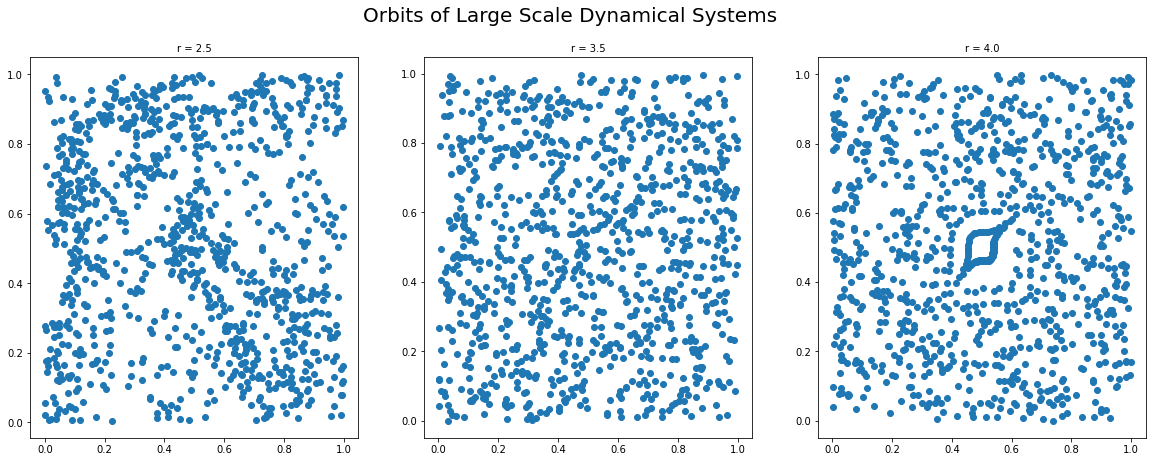

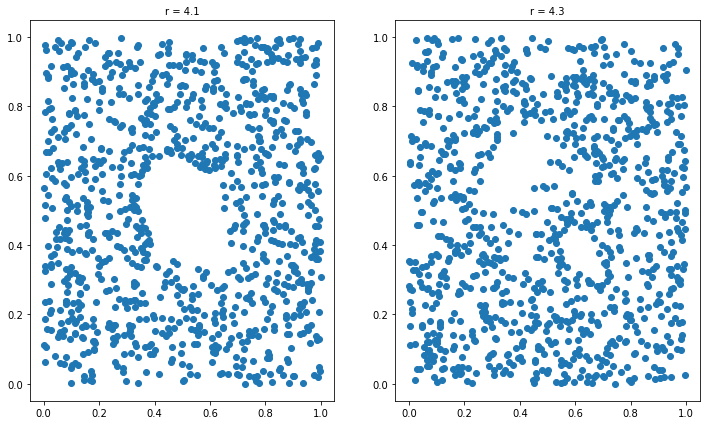

In [9]:
orbits5k = orbits(1000,params);

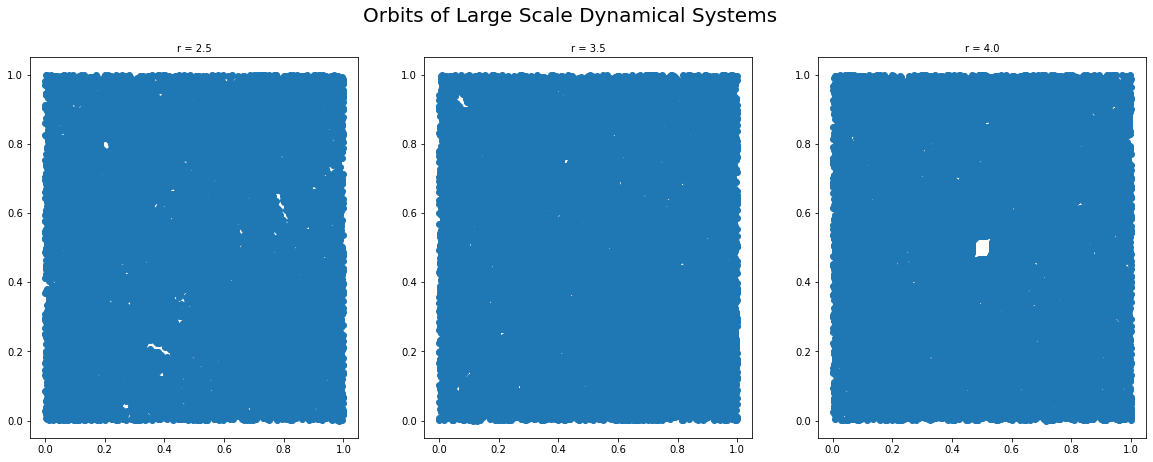

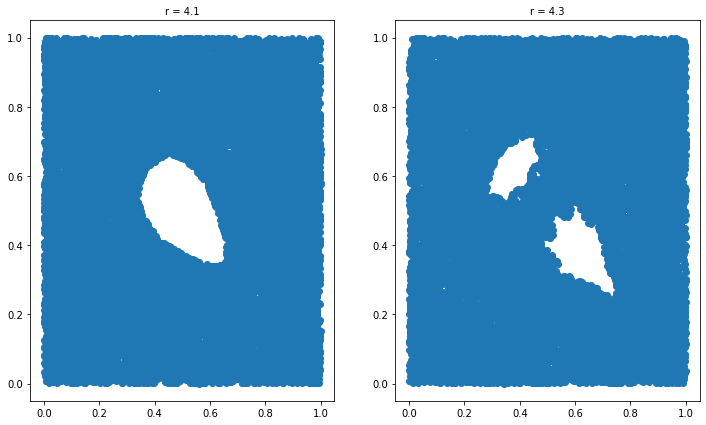

In [10]:
orbits100k = orbits(20000,params)

In [130]:
dataset = 'ORBIT5K'
os.mkdir('./data/ORBIT5K/')
generate_diagrams_and_features(dataset, path_dataset="./data/ORBIT5K/")
diags_dict, F, L = load_data(dataset, path_dataset="./data/ORBIT5K/")
F = np.array(F, dtype=np.float64)

Generating 1000 orbits and diagrams for r =  2.5 ...
Generating 1000 orbits and diagrams for r =  3.5 ...
Generating 1000 orbits and diagrams for r =  4.0 ...
Generating 1000 orbits and diagrams for r =  4.1 ...
Generating 1000 orbits and diagrams for r =  4.3 ...


In [123]:
D = preprocess(diags_dict, F)
model, optimizer, loss, metrics = get_model(dataset, F.shape[1])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


### Time-series

In [131]:
perslay_parameters = []
perslay_channel = {}

perslay_channel["pweight_train"] = True
perslay_channel["layer_train"]   = True

perslay_channel["layer"]           = "Image"
perslay_channel["image_size"]      = (20, 20)
perslay_channel["image_bnds"]      = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["lvariance_init"]  = rui(3.,3.)

perslay_channel["pweight"]       = "grid"
perslay_channel["pweight_size"]  = [20,20]
perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
perslay_channel["pweight_init"]  = rui(1.0, 1.0)

perslay_channel["perm_op"] = "sum"
perslay_parameters = [perslay_channel for _ in range(len(D))]

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    for i in range(len(D)): #input_shape=(image_size+1, image_size +1, 1)
                fmodel = tf.keras.Sequential([tf.keras.layers.Conv2D(10, 2, input_shape=(21,21,1)), tf.keras.layers.Flatten()])
                perslay_parameters[i]["final_model"] = fmodel
    # Final rho network is a simple dense layer to the number of labels 
    rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(12000+F.shape[1],))])#this 16000=pixels*len(D)*10 (20*20*10*4)
    model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)

    # Optimizer is Adam with exponential decay of learning rate and moving average of variables
    lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
    optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

    # Loss is cross-entropy
    loss = tf.keras.losses.CategoricalCrossentropy()

    # Metric is accuracy
    metrics = [tf.keras.metrics.CategoricalAccuracy()]

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


## Train the network

In [132]:
num_pts = len(D[0])

### Single run

Single run means using the `evaluate_model` function for training the PersLay architecture once and observing the performance (classification accuracy) on the test set.
- For orbit datasets, we suggest to use a 70-30 train-test split, i.e. `test_size = 0.3`.
- For graph datasets, we suggest to use a 90-10 train-test split, i.e. `test_size = 0.1`.

In [83]:
test_size = .1
epochs    = 100

In [84]:
random_perm = np.random.permutation(num_pts)
train, test = random_perm[:int((1-test_size)*num_pts)], random_perm[int((1-test_size)*num_pts):]

In [50]:
print(len(D[0]))

248


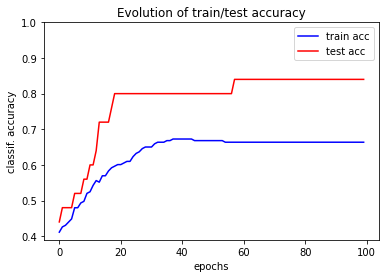

48.64543008804321


In [51]:
start_time = time.time()
_, tr, te = evaluate_model(L,F,D,train,test,model,optimizer,loss,metrics,num_epochs=epochs,verbose=0,plots=True)
print((time.time()-start_time))

In [52]:
print("Train accuracy = " + str(tr[1]) + ", test accuracy = " + str(te[1]))

Train accuracy = 0.6636771559715271, test accuracy = 0.8399999737739563


### Full experiment

This section is for reproducing the article experiments (10 x 10 folds). As is, it only works for predefined models (obtained with the `get_model` function), but if you want to use your own architecture and persistence diagrams, you just have to compact your model definition (done in Section 5.2) in a single function `get_model` that you can call for each fold.

In [133]:
num_folds = 10
epochs    = 100

In [134]:
folds = KFold(n_splits=num_folds, random_state=42, shuffle=True).split(np.empty([num_pts]))

In [135]:
test_size=.1
folds = ShuffleSplit(n_splits=num_folds, test_size=test_size, random_state=42).split(np.empty([num_pts]))

In [136]:
start_time = time.time()
tr, te = [], []
for (ir, ie) in folds:
    _, sr, se = evaluate_model(L, F, D, ir, ie, model, optimizer, loss, metrics, num_epochs=epochs, verbose=0)
    tr.append(sr[1])
    te.append(se[1])
time_delta = (time.time()-start_time)

In [137]:
print("Train accuracy = " + str(np.mean(tr)) + ", test accuracy = " + str(np.mean(te)), "Run time = " + str(time_delta))

Train accuracy = 0.11479820609092713, test accuracy = 0.05599999874830246 Run time = 349.23424196243286


# Bibliography

[1] _PersLay: A Simple and Versatile Neural Network Layer for Persistence Diagrams._
Mathieu Carrière, Frederic Chazal, Yuichi Ike, Théo Lacombe, Martin Royer, Yuhei Umeda.

[2] _Deep Sets._
Manzil Zaheer, Satwik Kottur, Siamak Ravanbakhsh, Barnabas Poczos, Ruslan Salakhutdinov, Alexander Smola.
_Advances in Neural Information Processing Systems 30 (NIPS 2017)_

[3] _Learning Representations of Persistence Barcodes._
Christoph Hofer, Roland Kwitt, Marc Niethammer.
_JMLR (2019)_